In [11]:
import numpy as np 
import yaml
import os 
import matplotlib.pyplot as plt

def csvread(name):
    dataraw = open(name+'.csv','r')
    
    # Empty dictionary for each column
    data_rmsd = {}
    counter = 0
    for line in dataraw:
        if line.strip():
            line = line.strip("\n' '")
            line = line.split(",")
            # Storing the data in the dictionary
            if counter == 0:
                data_rmsd['frame'] = []
                counter += 1
                for j in np.arange(len(line)):
                    data_rmsd[str(j)] = []
            for i in np.arange(len(line)):
                element = line[i]
                if i == 0:
                    data_rmsd['frame'].append(int(element))
                else:
                    data_rmsd[str(i)].append(float(element))

    return data_rmsd


def refined_rmsd_resting(name):
    data = csvread(name)
    
    collected = []
    for n in np.arange(len(data)-2):
        test = data[str(n+1)][-1]
        if test < 500:
            collected.append(n+1)
            
    counter = 0 
    
    for m in collected:
        if counter == 0:
            total = np.asarray(data[str(m)])
            counter += 1
        else:
            total = total + np.asarray(data[str(m)])
    
    avg = total/len(collected)
    
    msd = avg*avg
    
    return avg, msd, data['frame']

def refined_rmsd_activated(name):
    data = csvread(name)
    
    collected = []
    for n in np.arange(len(data)-2):
        test = data[str(n+1)][-1]
        if test < 100:
            collected.append(n+1)
            
    counter = 0 
    
    for m in collected:
        if counter == 0:
            total = np.asarray(data[str(m)])
            counter += 1
        else:
            total = total + np.asarray(data[str(m)])
    
    avg = total/len(collected)
    
    msd = avg*avg
    
    return avg, msd, data['frame']

In [13]:
avg1, msd1, time1 = refined_rmsd_resting('restingrmsd1')
avg2, msd2, time2 = refined_rmsd_resting('restingrmsd2')
avg3, msd3, time3 = refined_rmsd_resting('restingrmsd3')

avg4, msd4, time4 = refined_rmsd_activated('activatedrmsd1')
avg5, msd5, time5 = refined_rmsd_activated('activatedrmsd2')
avg6, msd6, time6 = refined_rmsd_activated('activatedrmsd3')

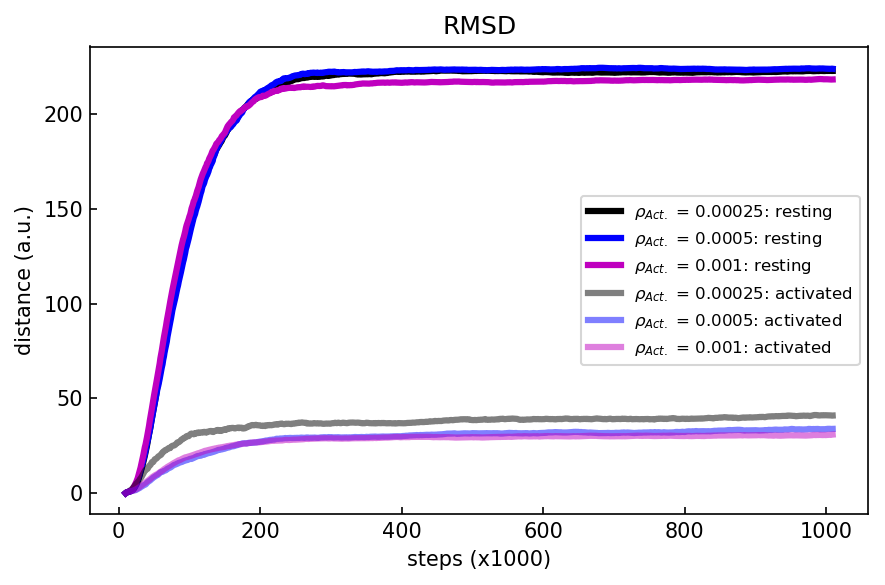

In [14]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('RMSD')
plt.plot(time1,avg1,'k',lw=3,alpha=1,label=r'$\rho_{Act.}$ = 0.00025: resting')
plt.plot(time2,avg2,'b',lw=3,alpha=1,label=r'$\rho_{Act.}$ = 0.0005: resting')
plt.plot(time3,avg3,'m',lw=3,alpha=1,label=r'$\rho_{Act.}$ = 0.001: resting')
plt.plot(time4,avg4,'k',lw=3,alpha=0.5,label=r'$\rho_{Act.}$ = 0.00025: activated')
plt.plot(time5,avg5,'b',lw=3,alpha=0.5,label=r'$\rho_{Act.}$ = 0.0005: activated')
plt.plot(time6,avg6,'m',lw=3,alpha=0.5,label=r'$\rho_{Act.}$ = 0.001: activated')
plt.xlabel('steps (x1000)')
plt.ylabel('distance (a.u.)')
plt.legend(loc=0,fontsize=8)
plt.tight_layout()

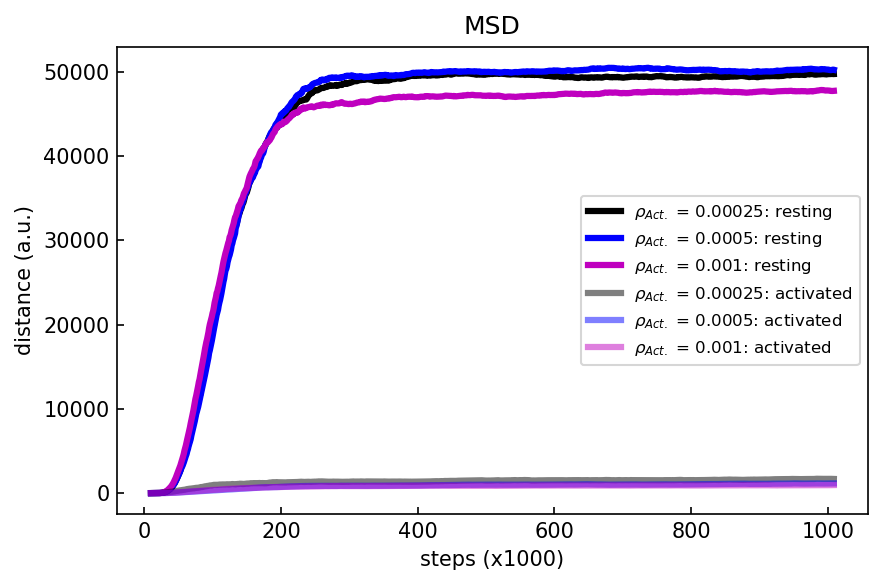

In [15]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('MSD')
plt.plot(time1,msd1,'k',lw=3,alpha=1,label=r'$\rho_{Act.}$ = 0.00025: resting')
plt.plot(time2,msd2,'b',lw=3,alpha=1,label=r'$\rho_{Act.}$ = 0.0005: resting')
plt.plot(time3,msd3,'m',lw=3,alpha=1,label=r'$\rho_{Act.}$ = 0.001: resting')
plt.plot(time4,msd4,'k',lw=3,alpha=0.5,label=r'$\rho_{Act.}$ = 0.00025: activated')
plt.plot(time5,msd5,'b',lw=3,alpha=0.5,label=r'$\rho_{Act.}$ = 0.0005: activated')
plt.plot(time6,msd6,'m',lw=3,alpha=0.5,label=r'$\rho_{Act.}$ = 0.001: activated')
plt.xlabel('steps (x1000)')
plt.ylabel('distance (a.u.)')
plt.legend(loc=0,fontsize=8)
plt.tight_layout()

In [2]:
data1 = csvread('resting_density1')
data2 = csvread('resting_density2')
data3 = csvread('resting_density3')
data4 = csvread('activated_density1')
data5 = csvread('activated_density2')
data6 = csvread('activated_density3')

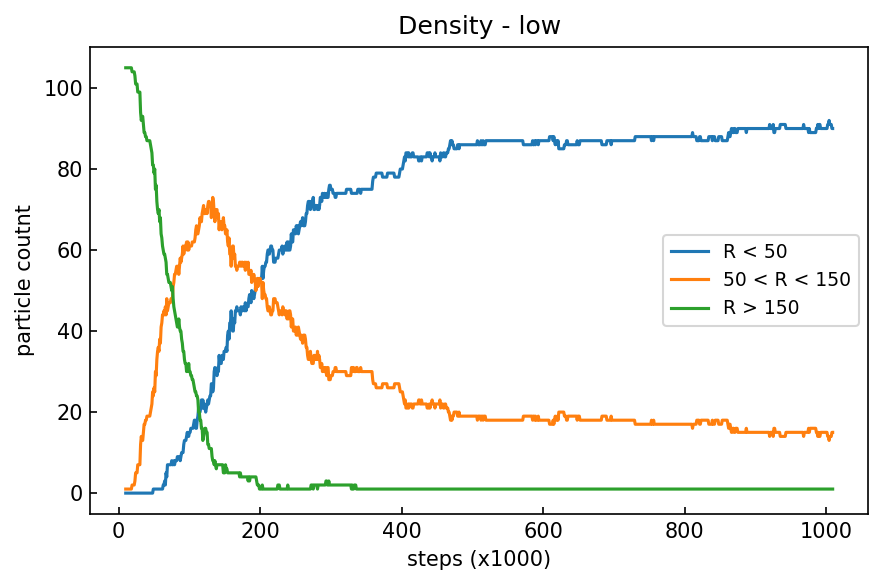

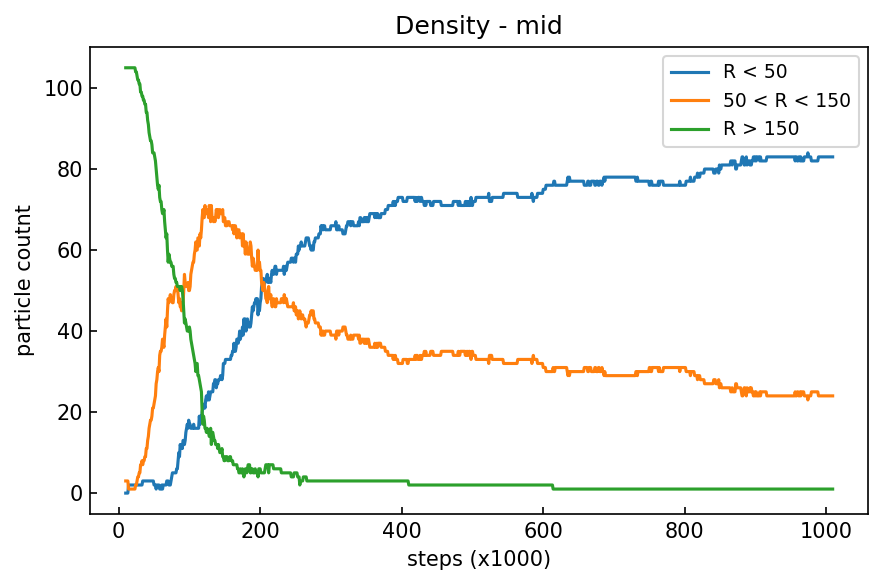

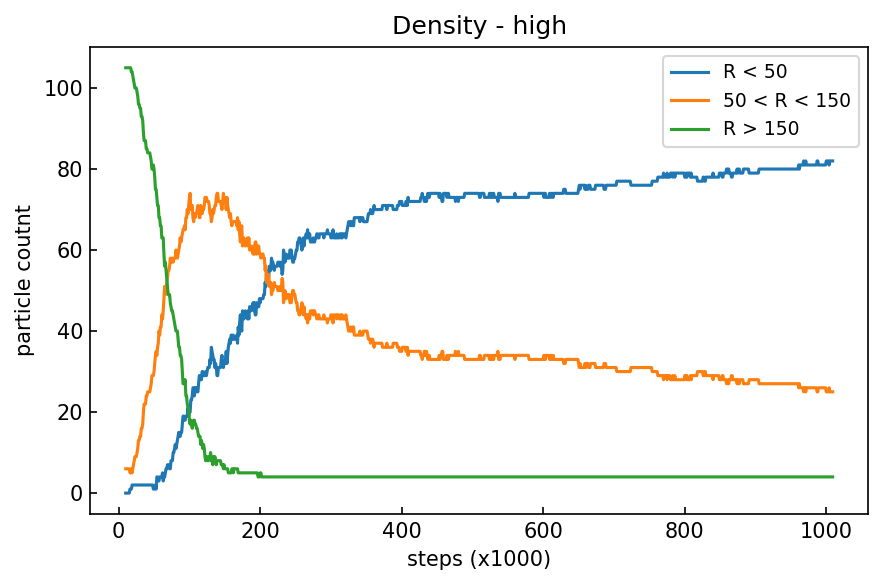

In [8]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - low')
plt.plot(data1['frame'],data1['1'],label='R < 50')
plt.plot(data1['frame'],data1['2'],label='50 < R < 150')
plt.plot(data1['frame'],data1['3'],label='R > 150')
plt.xlabel('steps (x1000)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - mid')
plt.plot(data2['frame'],data2['1'],label='R < 50')
plt.plot(data2['frame'],data2['2'],label='50 < R < 150')
plt.plot(data2['frame'],data2['3'],label='R > 150')
plt.xlabel('steps (x1000)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - high')
plt.plot(data3['frame'],data3['1'],label='R < 50')
plt.plot(data3['frame'],data3['2'],label='50 < R < 150')
plt.plot(data3['frame'],data3['3'],label='R > 150')
plt.xlabel('steps (x1000)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

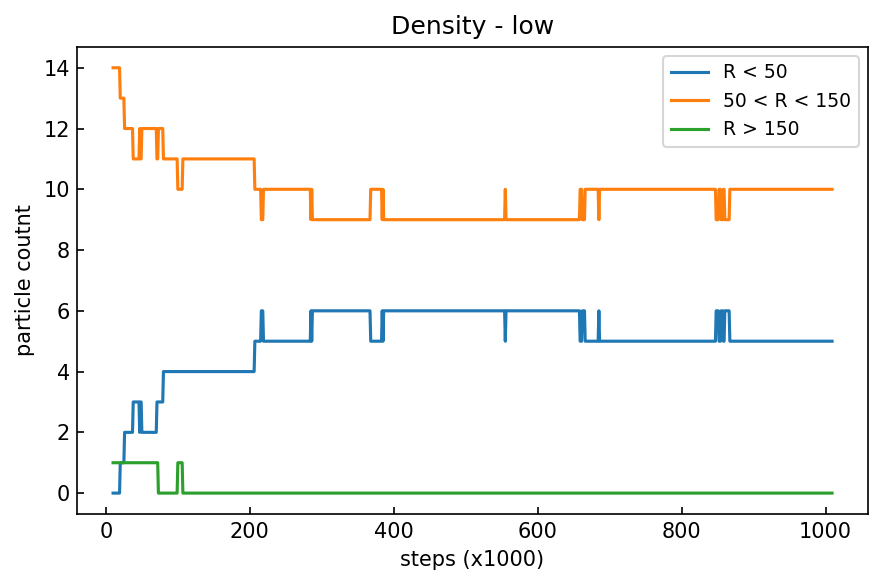

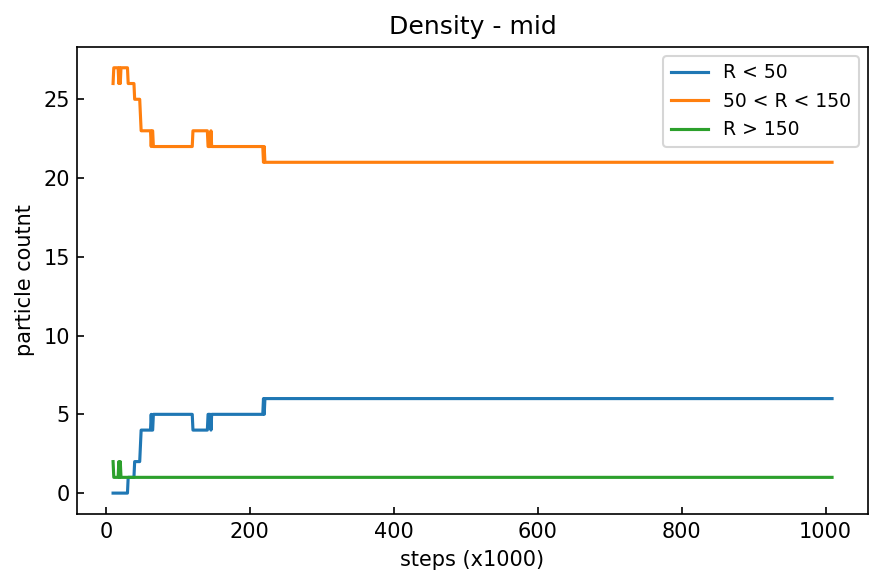

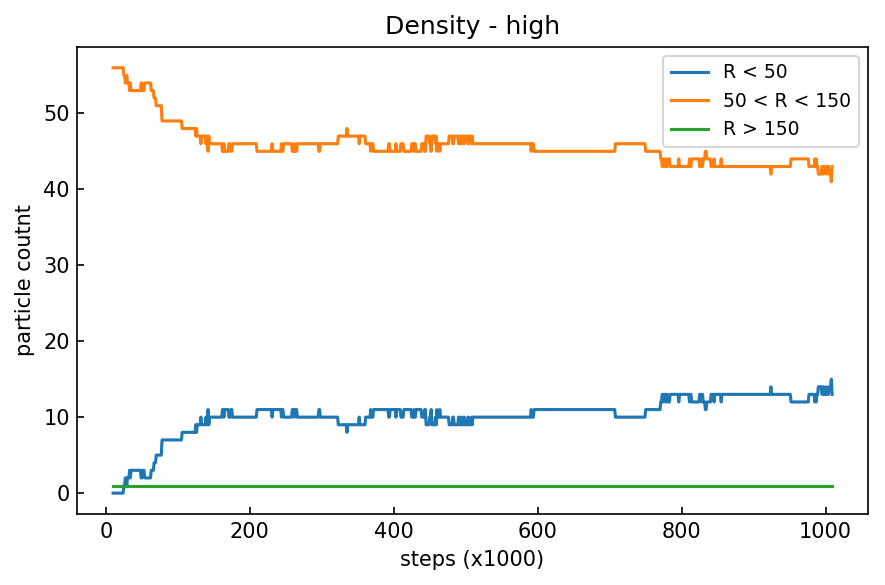

In [9]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - low')
plt.plot(data4['frame'],data4['1'],label='R < 50')
plt.plot(data4['frame'],data4['2'],label='50 < R < 150')
plt.plot(data4['frame'],data4['3'],label='R > 150')
plt.xlabel('steps (x1000)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - mid')
plt.plot(data5['frame'],data5['1'],label='R < 50')
plt.plot(data5['frame'],data5['2'],label='50 < R < 150')
plt.plot(data5['frame'],data5['3'],label='R > 150')
plt.xlabel('steps (x1000)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - high')
plt.plot(data6['frame'],data6['1'],label='R < 50')
plt.plot(data6['frame'],data6['2'],label='50 < R < 150')
plt.plot(data6['frame'],data6['3'],label='R > 150')
plt.xlabel('steps (x1000)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

In [4]:
truncateddata1={}
truncateddata2={}
truncateddata3={}
truncatedtime = []
for i in np.arange(len(data1['frame'])):
    if i%100 == 0:
        truncateddata1[str(i)] = []
        truncateddata2[str(i)] = []
        truncateddata3[str(i)] = []
        truncatedtime.append(i)
        for j in np.arange(3):
            element1 = data1[str(j+1)][i]
            element2 = data2[str(j+1)][i]
            element3 = data3[str(j+1)][i]
            truncateddata1[str(i)].append(element1)
            truncateddata2[str(i)].append(element2)
            truncateddata3[str(i)].append(element3)

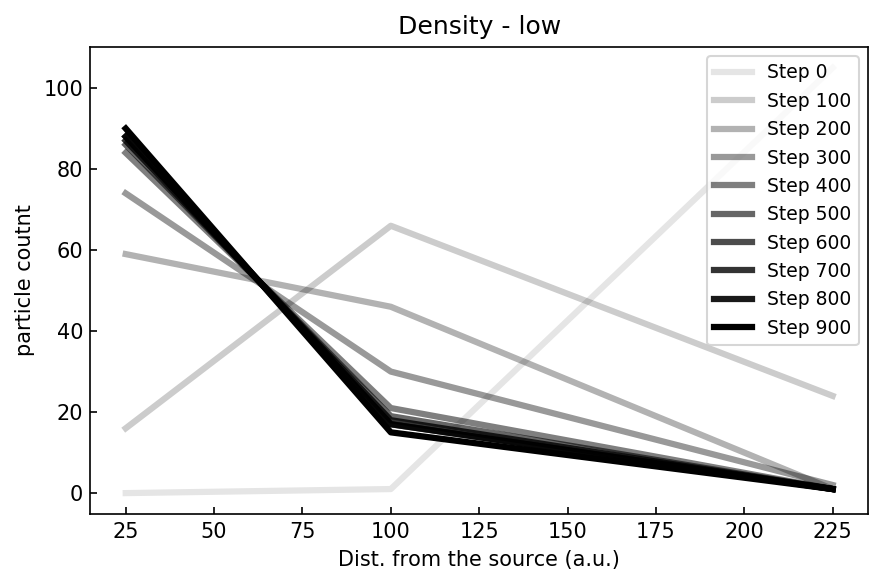

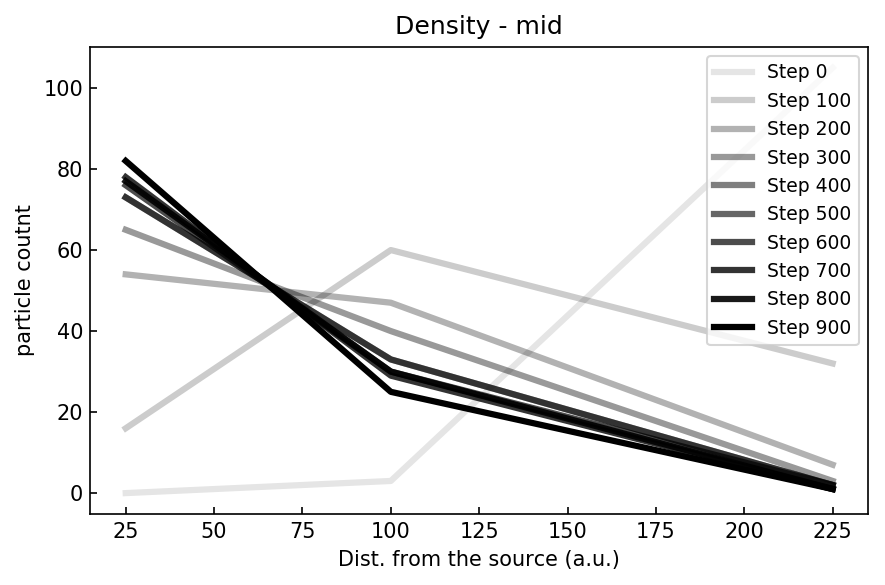

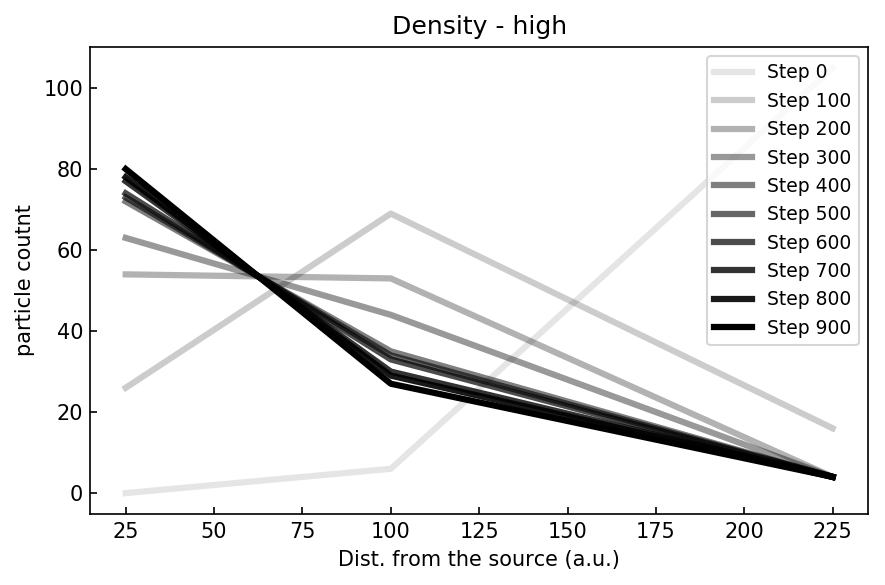

In [8]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - low')
count = 1
x = [25,100,225]
for i in truncatedtime:
    plt.plot(x,truncateddata1[str(i)],'k',lw=3,alpha=count/len(truncatedtime),label='Step '+str(i))
    count += 1

plt.xlabel('Dist. from the source (a.u.)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - mid')
count = 1
for i in truncatedtime:
    plt.plot(x,truncateddata2[str(i)],'k',lw=3,alpha=count/len(truncatedtime),label='Step '+str(i))
    count += 1

plt.xlabel('Dist. from the source (a.u.)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - high')
count = 1
for i in truncatedtime:
    plt.plot(x,truncateddata3[str(i)],'k',lw=3,alpha=count/len(truncatedtime),label='Step '+str(i))
    count += 1

plt.xlabel('Dist. from the source (a.u.)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

In [9]:
truncateddata1={}
truncateddata2={}
truncateddata3={}
truncatedtime = []
for i in np.arange(len(data1['frame'])):
    if i%100 == 0:
        truncateddata1[str(i)] = []
        truncateddata2[str(i)] = []
        truncateddata3[str(i)] = []
        truncatedtime.append(i)
        for j in np.arange(3):
            element1 = data4[str(j+1)][i]
            element2 = data5[str(j+1)][i]
            element3 = data6[str(j+1)][i]
            truncateddata1[str(i)].append(element1)
            truncateddata2[str(i)].append(element2)
            truncateddata3[str(i)].append(element3)

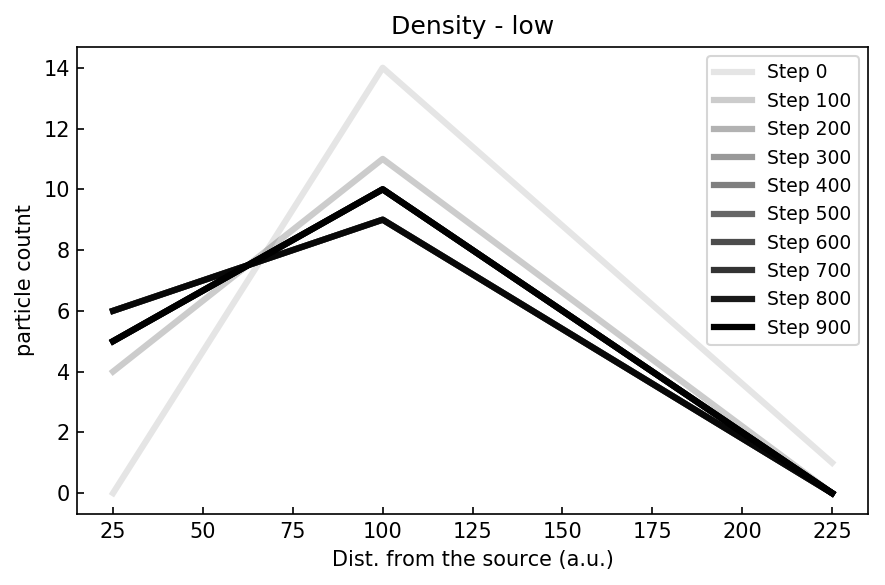

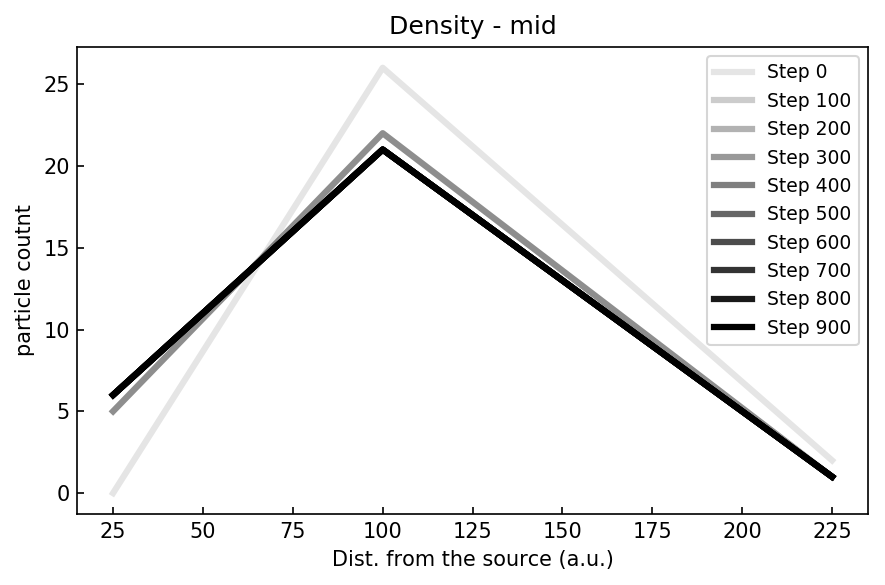

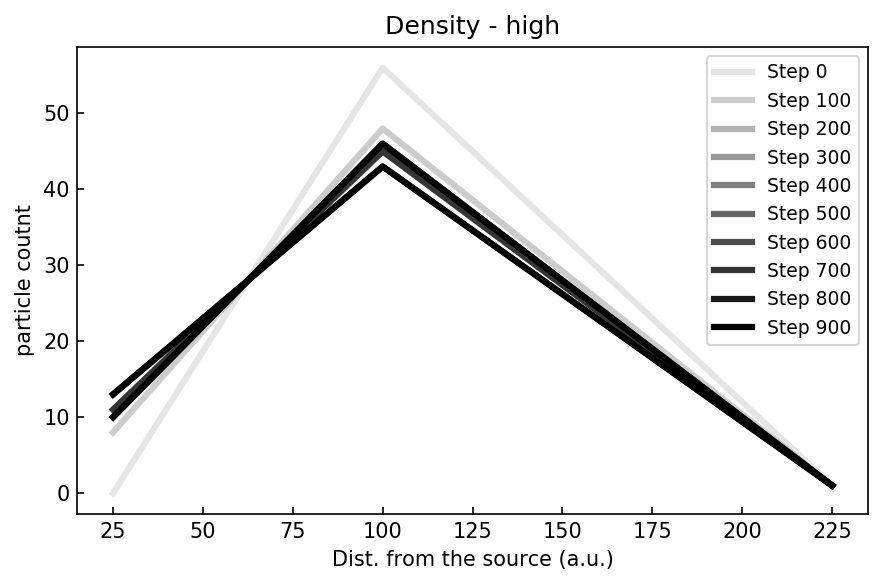

In [10]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - low')
count = 1
x = [25,100,225]
for i in truncatedtime:
    plt.plot(x,truncateddata1[str(i)],'k',lw=3,alpha=count/len(truncatedtime),label='Step '+str(i))
    count += 1

plt.xlabel('Dist. from the source (a.u.)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - mid')
count = 1
for i in truncatedtime:
    plt.plot(x,truncateddata2[str(i)],'k',lw=3,alpha=count/len(truncatedtime),label='Step '+str(i))
    count += 1

plt.xlabel('Dist. from the source (a.u.)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('Density - high')
count = 1
for i in truncatedtime:
    plt.plot(x,truncateddata3[str(i)],'k',lw=3,alpha=count/len(truncatedtime),label='Step '+str(i))
    count += 1

plt.xlabel('Dist. from the source (a.u.)')
plt.ylabel('particle coutnt')
plt.legend(loc=0,fontsize=9)
plt.tight_layout()